# K-means clustering

## import library

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [38]:
fname_data = 'assignment_11_data.csv'

feature = np.genfromtxt(fname_data, delimiter=',')

x = feature[:,0]
y = feature[:,1]

number_data     = np.size(feature, 0)
number_feature  = np.size(feature, 1)

print('number of data : {}'.format(number_data))
print('number of feature : {}'.format(number_feature))

number of data : 1000
number of feature : 2


## plot the input data

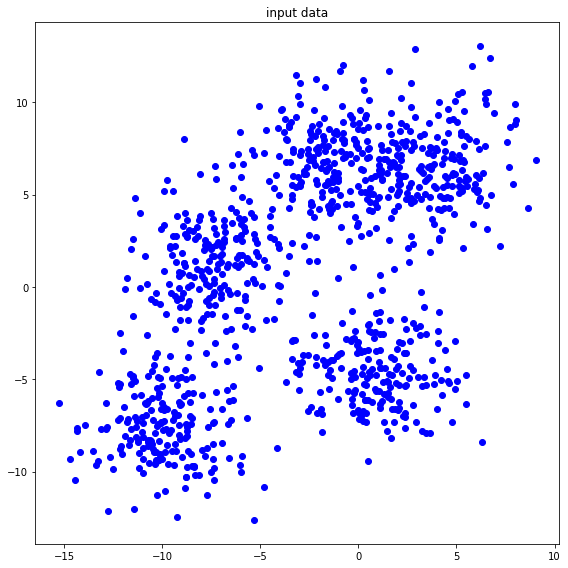

In [39]:
plt.figure(figsize=(8,8))   
plt.title('input data')

plt.scatter(x, y, color='blue')

plt.tight_layout()
plt.show()

## compute distance
- feature : $n \times m$, center : $1 \times m$, distance : $n \times 1$
- $n$ : number of data, $m$ : number of features

In [40]:
def compute_distance(feature, center):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    deviation = np.reshape(feature - center, feature.shape)
    distance = np.sum(deviation**2, axis=1)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return distance

## compute centroid
- feature : $n \times m$, label_feature : $n \times 1$, value_label : $1 \times 1$, centroid : $1 \times m$
- $n$ : number of data, $m$ : number of features

In [41]:
def compute_centroid(feature, label_feature, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    label_weight = np.where(label_feature == label, 1, 0).reshape(-1,1)
    centroid = np.sum(feature * label_weight, axis=0) / np.count_nonzero(label_weight)


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return centroid

## compute label
- distance : $n \times k$, label_feature : $n \times 1$
- $n$ : number of data, $k$ : number of clusters

In [42]:
def compute_label(distance):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    label_feature = np.argmin(distance, axis=1).reshape(-1,1)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return label_feature


## compute loss

In [43]:
def compute_loss(feature, label_feature, centroid, number_cluster) :

    loss = 0
    for i in range(number_cluster) :
        cluster = np.delete(feature, np.where(label_feature != i), axis=0)
        loss = loss + np.sum(compute_distance(cluster, centroid[i]))

    loss = loss / feature.shape[0]

    return loss

## the number of clusters $K = 2$

In [44]:
number_cluster          = 2
number_iteration        = 50    # you can modify this value
loss_iteration_02       = np.zeros(number_iteration)
centroid_iteration_02   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_02        = np.random.randint(0, number_cluster, size=(number_data))

In [45]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#

#initialize
distance = np.zeros((number_cluster, number_data))
for k in range(number_cluster) :
    centroid_iteration_02[-1][k][:] = compute_centroid(feature, label_feature_02, k)

#optimize
for i in range(number_iteration) :
    for j in range(number_cluster) :
        distance[j][:] = compute_distance(feature, centroid_iteration_02[i - 1][j][:])
    
    label_feature_02 = compute_label(distance.T)

    for k in range(number_cluster) :
        if np.any(label_feature_02 == k) :
            centroid_iteration_02[i][k][:] = compute_centroid(feature, label_feature_02, k)
        else :
            centroid_iteration_02[i][k][:] = centroid_iteration_02[i - 1][k][:]

    loss_iteration_02[i] = compute_loss(feature, label_feature_02, centroid_iteration_02[i], number_cluster)

#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

## the number of clusters $K = 4$

In [46]:
number_cluster          = 4
number_iteration        = 50     # you can modify this value
loss_iteration_04       = np.zeros(number_iteration)
centroid_iteration_04   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_04        = np.random.randint(0, number_cluster, size=(number_data))

In [47]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#

#initialize
distance = np.zeros((number_cluster, number_data))
for k in range(number_cluster) :
    centroid_iteration_04[-1][k][:] = compute_centroid(feature, label_feature_04, k)

#optimize
for i in range(number_iteration) :
    for j in range(number_cluster) :
        distance[j][:] = compute_distance(feature, centroid_iteration_04[i - 1][j][:])
    
    label_feature_04 = compute_label(distance.T)

    for k in range(number_cluster) :
        if np.any(label_feature_04 == k) :
            centroid_iteration_04[i][k][:] = compute_centroid(feature, label_feature_04, k)
        else :
            centroid_iteration_04[i][k][:] = centroid_iteration_04[i - 1][k][:]

    loss_iteration_04[i] = compute_loss(feature, label_feature_04, centroid_iteration_04[i], number_cluster)

#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

## the number of clusters $K = 8$

In [48]:
number_cluster          = 8
number_iteration        = 50     # you can modify this value
loss_iteration_08       = np.zeros(number_iteration)
centroid_iteration_08   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_08        = np.random.randint(0, number_cluster, size=(number_data))

In [49]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#

#initialize
distance = np.zeros((number_cluster, number_data))
for k in range(number_cluster) :
    centroid_iteration_08[-1][k][:] = compute_centroid(feature, label_feature_08, k)

#optimize
for i in range(number_iteration) :
    for j in range(number_cluster) :
        distance[j][:] = compute_distance(feature, centroid_iteration_08[i - 1][j][:])
    
    label_feature_08 = compute_label(distance.T)

    for k in range(number_cluster) :
        if np.any(label_feature_08 == k) :
            centroid_iteration_08[i][k][:] = compute_centroid(feature, label_feature_08, k)
        else :
            centroid_iteration_08[i][k][:] = centroid_iteration_08[i - 1][k][:]

    loss_iteration_08[i] = compute_loss(feature, label_feature_08, centroid_iteration_08[i], number_cluster)

#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

## the number of clusters $K = 16$

In [50]:
number_cluster          = 16
number_iteration        = 50     # you can modify this value
loss_iteration_16       = np.zeros(number_iteration)
centroid_iteration_16   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_16        = np.random.randint(0, number_cluster, size=(number_data))

In [51]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#

#initialize
distance = np.zeros((number_cluster, number_data))
for k in range(number_cluster) :
    centroid_iteration_16[-1][k][:] = compute_centroid(feature, label_feature_16, k)

#optimize
for i in range(number_iteration) :
    for j in range(number_cluster) :
        distance[j][:] = compute_distance(feature, centroid_iteration_16[i - 1][j][:])
    
    label_feature_16 = compute_label(distance.T)

    for k in range(number_cluster) :
        if np.any(label_feature_16 == k) :
            centroid_iteration_16[i][k][:] = compute_centroid(feature, label_feature_16, k)
        else :
            centroid_iteration_16[i][k][:] = centroid_iteration_16[i - 1][k][:]

    loss_iteration_16[i] = compute_loss(feature, label_feature_16, centroid_iteration_16[i], number_cluster)

#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

---

---

## functions for presenting the results

---

---

In [52]:
def function_result_01():

    print("final loss (K=2) = {:13.10f}".format(loss_iteration_02[-1]))
    

In [53]:
def function_result_02():

    print("final loss (K=4) = {:13.10f}".format(loss_iteration_04[-1]))
    

In [54]:
def function_result_03():

    print("final loss (K=8) = {:13.10f}".format(loss_iteration_08[-1]))
    

In [55]:
def function_result_04():

    print("final loss (K=16) = {:13.10f}".format(loss_iteration_16[-1]))
    

In [56]:
def function_result_05():
    
    plt.figure(figsize=(8,6)) 
    plt.title('loss (K=2)')

    plt.plot(loss_iteration_02, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [57]:
def function_result_06():
    
    plt.figure(figsize=(8,6)) 
    plt.title('loss (K=4)')

    plt.plot(loss_iteration_04, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [58]:
def function_result_07():
    
    plt.figure(figsize=(8,6))
    plt.title('loss (K=8)')

    plt.plot(loss_iteration_08, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [59]:
def function_result_08():
    
    plt.figure(figsize=(8,6))
    plt.title('loss (K=16)')

    plt.plot(loss_iteration_16, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [60]:
def function_result_09():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=2)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    x = centroid_iteration_02.T[0][:][:]
    y = centroid_iteration_02.T[1][:][:]

    for i in range(2):
        plt.plot(x[i],y[i], '-', label='cluster'+str(i), zorder=1)
        plt.scatter(x[i][0], y[i][0], marker = 'o', c='b', zorder=2)
        plt.scatter(x[i][-1], y[i][-1], marker = 's', c='r', zorder=3)

    plt.scatter(x[0][0], y[0][0], marker = 'o', label = 'initial', c='b', zorder=2)
    plt.scatter(x[0][-1], y[0][-1], marker = 's', label = 'final', c='r', zorder=3)
    
    plt.tight_layout()
    plt.legend(loc = 'upper left')
    plt.show()

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [61]:
def function_result_10():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=4)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    x = centroid_iteration_04.T[0][:][:]
    y = centroid_iteration_04.T[1][:][:]

    for i in range(4):
        plt.plot(x[i],y[i], '-', label='cluster'+str(i), zorder=1)
        plt.scatter(x[i][0], y[i][0], marker = 'o', c='b', zorder=2)
        plt.scatter(x[i][-1], y[i][-1], marker = 's', c='r', zorder=3)

    plt.scatter(x[0][0], y[0][0], marker = 'o', label = 'initial', c='b', zorder=2)
    plt.scatter(x[0][-1], y[0][-1], marker = 's', label = 'final', c='r', zorder=3)

    plt.tight_layout()
    plt.legend(loc = 'upper left')
    plt.show()

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [62]:
def function_result_11():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=8)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    x = centroid_iteration_08.T[0][:][:]
    y = centroid_iteration_08.T[1][:][:]

    for i in range(8):
        plt.plot(x[i],y[i], '-', label='cluster'+str(i), zorder=1)
        plt.scatter(x[i][0], y[i][0], marker = 'o', c='b', zorder=2)
        plt.scatter(x[i][-1], y[i][-1], marker = 's', c='r', zorder=3)

    plt.scatter(x[0][0], y[0][0], marker = 'o', label = 'initial', c='b', zorder=2)
    plt.scatter(x[0][-1], y[0][-1], marker = 's', label = 'final', c='r', zorder=3)

    plt.tight_layout()
    plt.legend(loc = 'upper left')
    plt.show()

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [63]:
def function_result_12():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=16)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    x = centroid_iteration_16.T[0][:][:]
    y = centroid_iteration_16.T[1][:][:]

    for i in range(16):
        plt.plot(x[i],y[i], '-', label='cluster'+str(i), zorder=1)
        plt.scatter(x[i][0], y[i][0], marker = 'o', c='b', zorder=2)
        plt.scatter(x[i][-1], y[i][-1], marker = 's', c='r', zorder=3)

    plt.scatter(x[0][0], y[0][0], marker = 'o', label = 'initial', c='b', zorder=2)
    plt.scatter(x[0][-1], y[0][-1], marker = 's', label = 'final', c='r', zorder=3)

    plt.tight_layout()
    plt.legend(loc = 'upper left')
    plt.show()

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [64]:
def function_result_13():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=2)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    c = ['r','b']
    cmap = colors.ListedColormap(c)
    norm = colors.BoundaryNorm(np.arange(-0.5, 2), cmap.N)

    cluster = np.concatenate([feature, label_feature_02], 1)
    plt.scatter(x = cluster[:,0], y = cluster[:,1], c=cluster[:,2], label = 'cluster' + str(i), cmap=cmap, norm=norm)

    cbar = plt.colorbar(ticks = np.linspace(0,1,2))
    cbar.set_label("cluster")

    plt.tight_layout()
    plt.show()


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [65]:
def function_result_14():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=4)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    c = ['r','g','b','c']
    cmap = colors.ListedColormap(c)
    norm = colors.BoundaryNorm(np.arange(-0.5, 4), cmap.N)

    cluster = np.concatenate([feature, label_feature_04], 1)
    plt.scatter(x = cluster[:,0], y = cluster[:,1], c=cluster[:,2], label = 'cluster' + str(i), cmap=cmap, norm=norm)

    cbar = plt.colorbar(ticks = np.linspace(0,3,4))
    cbar.set_label("cluster")

    plt.tight_layout()
    plt.show()


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [66]:
def function_result_15():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=8)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    c = ['r','g','b','c','m','y','tab:blue','tab:orange']
    cmap = colors.ListedColormap(c)
    norm = colors.BoundaryNorm(np.arange(-0.5, 8), cmap.N)

    cluster = np.concatenate([feature, label_feature_08], 1)
    plt.scatter(x = cluster[:,0], y = cluster[:,1], c=cluster[:,2], label = 'cluster' + str(i), cmap=cmap, norm=norm)

    cbar = plt.colorbar(ticks = np.linspace(0,7,8))
    cbar.set_label("cluster")

    plt.tight_layout()
    plt.show()


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [67]:
def function_result_16():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=16)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    c = ['r','g','b','c','m','y','k','gold', 'indigo', 'tab:blue','tab:orange','tab:red','tab:purple','tab:brown','tab:pink','tab:gray']
    cmap = colors.ListedColormap(c)
    norm = colors.BoundaryNorm(np.arange(-0.5, 16), cmap.N)

    cluster = np.concatenate([feature, label_feature_16], 1)
    plt.scatter(x = cluster[:,0], y = cluster[:,1], c=cluster[:,2], cmap=cmap, norm=norm)

    cbar = plt.colorbar(ticks = np.linspace(0,15, 16))
    cbar.set_label("cluster")

    plt.tight_layout()
    plt.show()

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

---

---

## results

---

---

**************************************************
## [RESULT 01]
**************************************************
final loss (K=2) = 31.0990580542
**************************************************
## [RESULT 02]
**************************************************
final loss (K=4) = 10.5648424870
**************************************************
## [RESULT 03]
**************************************************
final loss (K=8) =  5.6820602853
**************************************************
## [RESULT 04]
**************************************************
final loss (K=16) =  3.2804255701
**************************************************
## [RESULT 05]
**************************************************


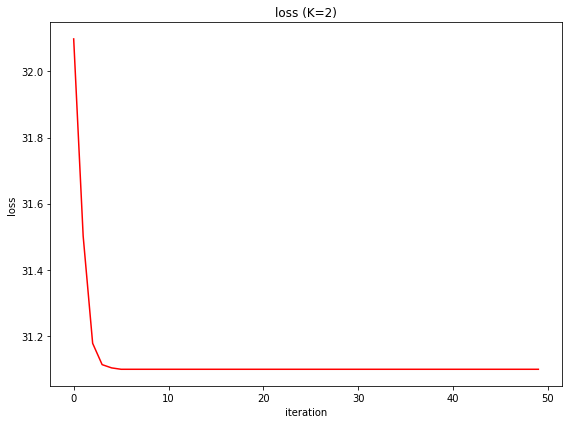

**************************************************
## [RESULT 06]
**************************************************


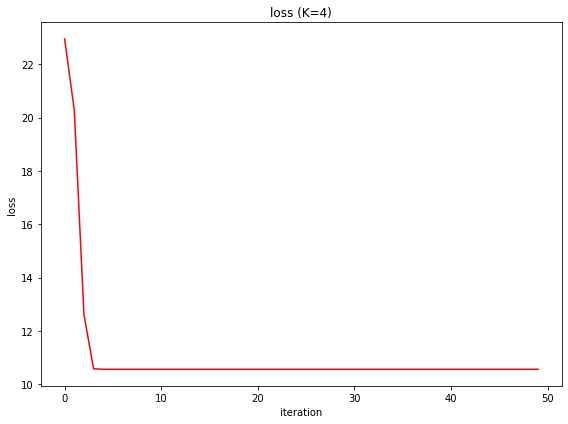

**************************************************
## [RESULT 07]
**************************************************


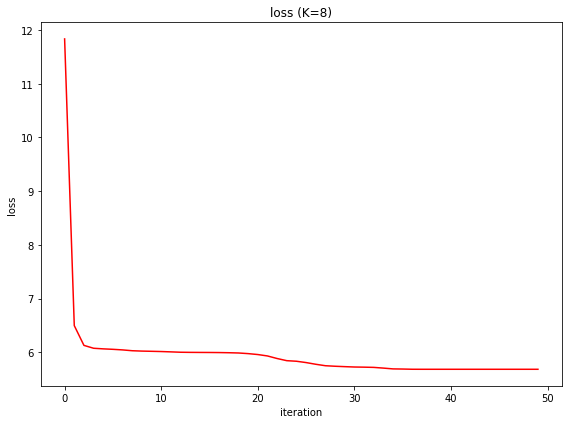

**************************************************
## [RESULT 08]
**************************************************


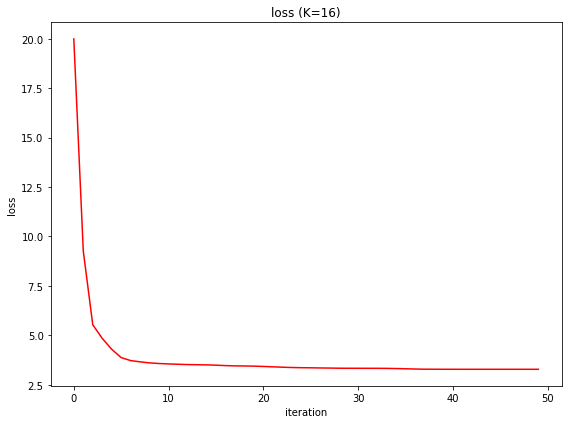

**************************************************
## [RESULT 09]
**************************************************


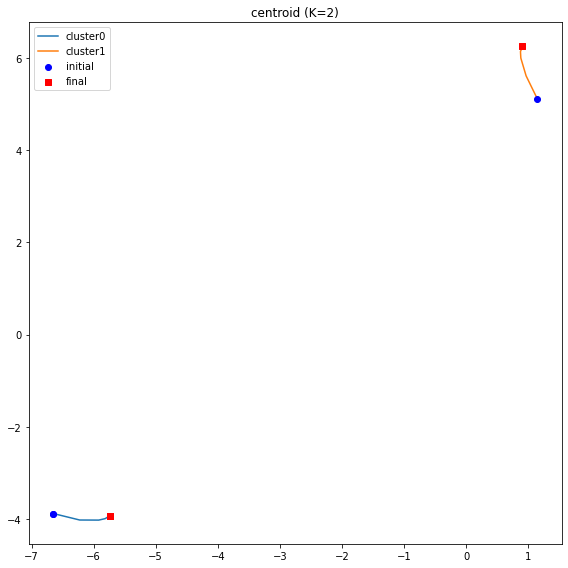

**************************************************
## [RESULT 10]
**************************************************


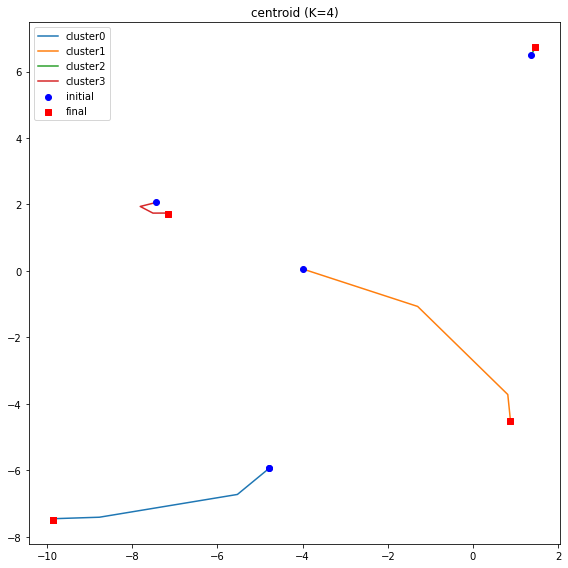

**************************************************
## [RESULT 11]
**************************************************


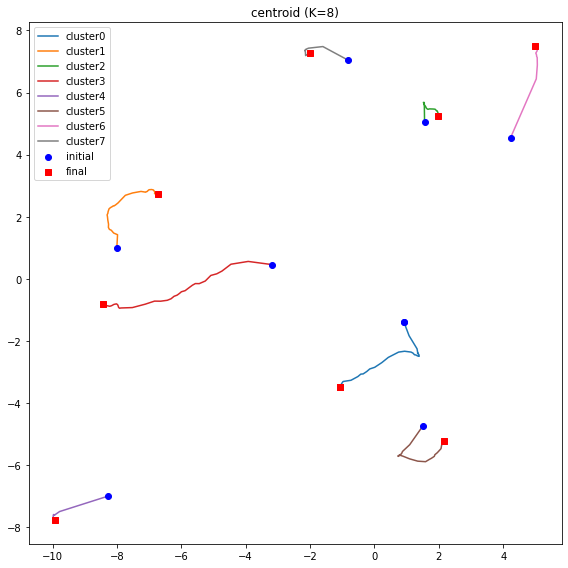

**************************************************
## [RESULT 12]
**************************************************


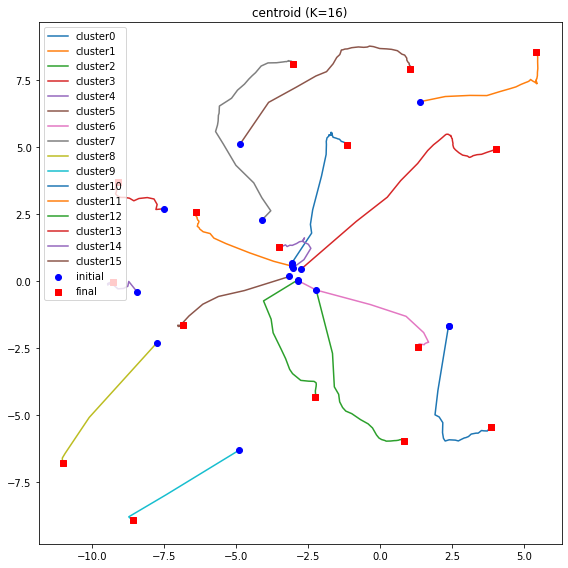

**************************************************
## [RESULT 13]
**************************************************


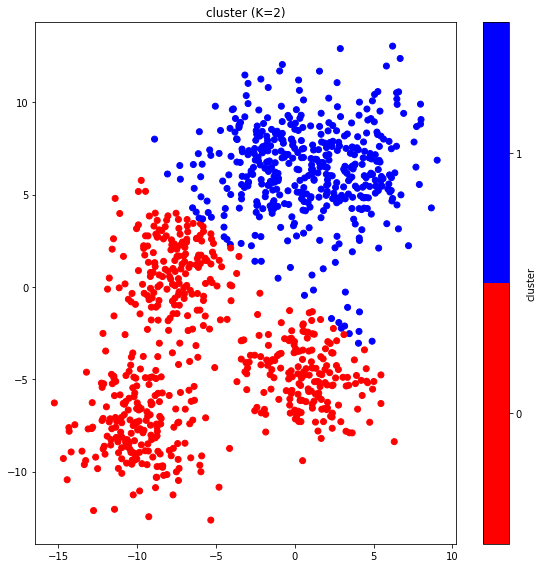

**************************************************
## [RESULT 14]
**************************************************


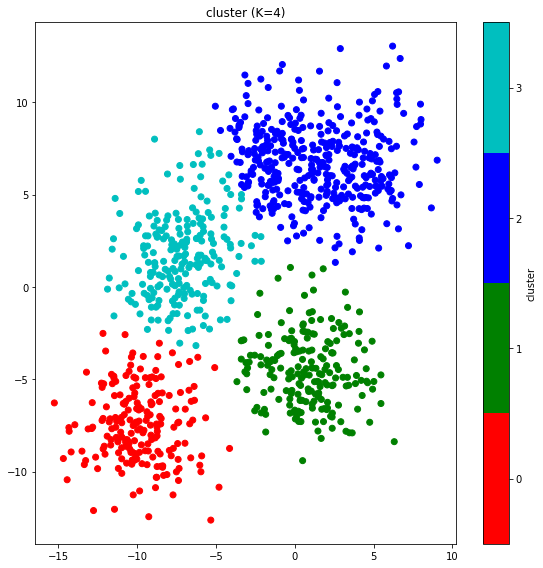

**************************************************
## [RESULT 15]
**************************************************


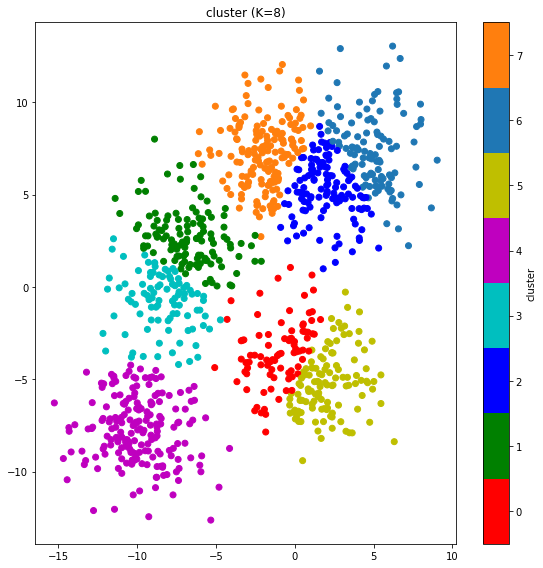

**************************************************
## [RESULT 16]
**************************************************


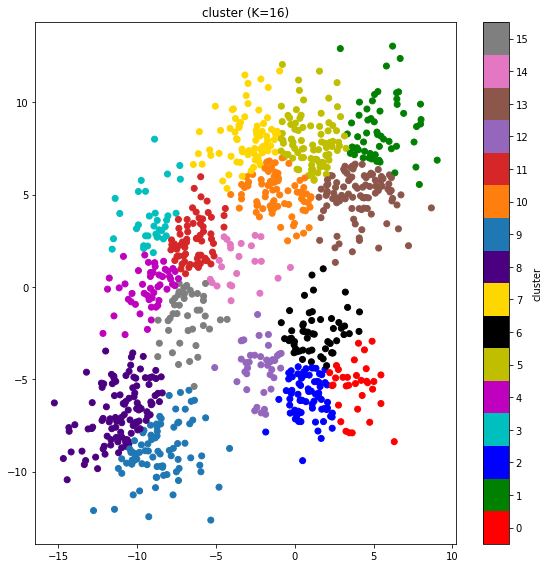

In [68]:
number_result = 16

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)